In [1]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import scipy.stats as stats
import pandas_profiling

plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True

from matplotlib.backends.backend_pdf import PdfPages

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
import sklearn.metrics as metrics

In [2]:
#reading data into dataframe
mydata = pd.read_csv('CC_GENERAL.csv')
mydata.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
mydata.drop(['CUST_ID'],axis = 1,inplace = True)

In [4]:
#Handling Outliers - at 99%tile
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

mydata = mydata.apply(lambda x: outlier_capping(x))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  after removing the cwd from sys.path.


In [5]:
#Handling missings with median
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x

mydata = mydata.apply(lambda x: Missing_imputation(x))

In [6]:
#Deriving KPI's
mydata['LIMIT_USAGE'] = mydata['BALANCE']/mydata['CREDIT_LIMIT']
mydata['P_MP_RATIO'] = mydata['PAYMENTS']/mydata['MINIMUM_PAYMENTS']
mydata['MONTHLY_AVG_PURCHASES'] = mydata['PURCHASES']/mydata['TENURE']
mydata['MONTHLY_AVG_CASH_ADVANCE'] = mydata['CASH_ADVANCE']/mydata['TENURE']
mydata['AVG_AMT_PER_PURCHASE'] = mydata['PURCHASES']/mydata['PURCHASES_TRX']
mydata['AVG_CASH_ADV_PER_TRX'] = mydata['CASH_ADVANCE']/mydata['CASH_ADVANCE_TRX']

In [7]:
mydata.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                       float64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
LIMIT_USAGE                         float64
P_MP_RATIO                          float64
MONTHLY_AVG_PURCHASES               float64
MONTHLY_AVG_CASH_ADVANCE            float64
AVG_AMT_PER_PURCHASE                float64
AVG_CASH_ADV_PER_TRX            

In [8]:
mydata.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'LIMIT_USAGE', 'P_MP_RATIO', 'MONTHLY_AVG_PURCHASES',
       'MONTHLY_AVG_CASH_ADVANCE', 'AVG_AMT_PER_PURCHASE',
       'AVG_CASH_ADV_PER_TRX'],
      dtype='object')

In [9]:
mydata.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1541.046707,1966.597484,0.065101,128.281915,873.385231,2054.140036,9.338805e+03
BALANCE_FREQUENCY,8950.0,0.878083,0.234032,0.090909,0.888889,1.000000,1.000000,1.000000e+00
PURCHASES,8950.0,936.229237,1525.185179,0.000000,39.635000,361.280000,1110.130000,8.977290e+03
ONEOFF_PURCHASES,8950.0,536.493774,1096.913512,0.000000,0.000000,38.000000,577.405000,6.689898e+03
INSTALLMENTS_PURCHASES,8950.0,384.498368,676.271068,0.000000,0.000000,89.000000,468.637500,3.886241e+03
CASH_ADVANCE,8950.0,935.920972,1775.774147,0.000000,0.000000,0.000000,1113.821139,9.588163e+03
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.000000e+00
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.000000e+00
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.000000e+00
CASH_ADVANCE_FREQUENCY,8950.0,0.134017,0.195550,0.000000,0.000000,0.000000,0.222222,8.333330e-01


In [10]:
mydata.isnull().sum()

BALANCE                                0
BALANCE_FREQUENCY                      0
PURCHASES                              0
ONEOFF_PURCHASES                       0
INSTALLMENTS_PURCHASES                 0
CASH_ADVANCE                           0
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY             0
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_FREQUENCY                 0
CASH_ADVANCE_TRX                       0
PURCHASES_TRX                          0
CREDIT_LIMIT                           0
PAYMENTS                               0
MINIMUM_PAYMENTS                       0
PRC_FULL_PAYMENT                       0
TENURE                                 0
LIMIT_USAGE                            0
P_MP_RATIO                             0
MONTHLY_AVG_PURCHASES                  0
MONTHLY_AVG_CASH_ADVANCE               0
AVG_AMT_PER_PURCHASE                2041
AVG_CASH_ADV_PER_TRX                4628
dtype: int64

In [11]:
#Replacing inf values to NaN
mydata.replace([np.inf,-np.inf],np.nan,inplace = True)

In [12]:
#Imputing missing values manually
mydata['AVG_AMT_PER_PURCHASE'].fillna(mydata['AVG_AMT_PER_PURCHASE'].mean(),inplace = True)
mydata['AVG_CASH_ADV_PER_TRX'].fillna(mydata['AVG_CASH_ADV_PER_TRX'].mean(),inplace = True)

In [52]:
#Correlation matrix
corr_matrix = mydata.corr()
corr_matrix.to_csv('Correlation matrix.csv')

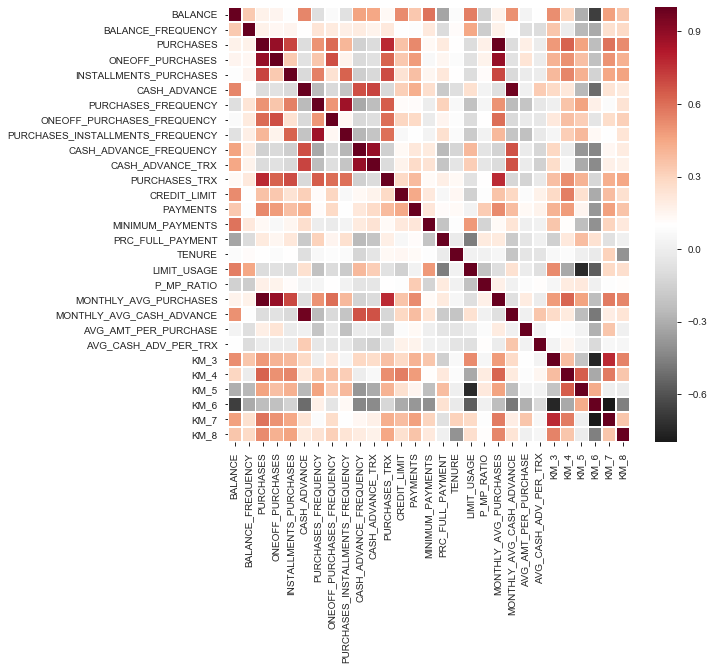

In [53]:
f,ax = plt.subplots(figsize = (9,8))
sns.heatmap(corr_matrix,cmap = 'RdGy_r',linewidth = 0.30,ax = ax)
plt.show()

In [13]:
mydata.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,LIMIT_USAGE,P_MP_RATIO,MONTHLY_AVG_PURCHASES,MONTHLY_AVG_CASH_ADVANCE,AVG_AMT_PER_PURCHASE,AVG_CASH_ADV_PER_TRX
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,201.802084,139.509787,0.000000,12,0.040901,1.446508,7.950000,0.000000,47.700000,427.496052
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,4103.032597,1072.340217,0.222222,12,0.457495,3.826241,0.000000,536.912124,94.232652,1610.736371
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,622.066742,627.284787,0.000000,12,0.332687,0.991682,64.430833,0.000000,64.430833,427.496052
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,0.000000,312.343947,0.000000,12,0.222223,0.000000,124.916667,17.149001,1499.000000,205.788017
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,678.334763,244.791237,0.000000,12,0.681429,2.771075,1.333333,0.000000,16.000000,427.496052


In [ ]:
#Creating pandas profiling report
profile_report = pandas_profiling.ProfileReport(mydata)
profile_report.to_file('profile_report.html')

In [14]:
#Standardization
sc = StandardScaler()
sc.fit(mydata)
mydata1 = sc.transform(mydata)

In [17]:
mydata_scaled = pd.DataFrame(mydata1, columns = mydata.columns)

In [19]:
#PCA
pca_model = PCA(mydata_scaled.shape[1])
pca_model.fit(mydata_scaled)

PCA(copy=True, iterated_power='auto', n_components=23, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [28]:
np.set_printoptions(suppress = True)
pca_model.explained_variance_

array([5.92115, 4.67043, 2.14182, 1.67132, 1.31487, 1.08516, 1.01501,
       0.87248, 0.76365, 0.70124, 0.62732, 0.51547, 0.36147, 0.30938,
       0.2892 , 0.23305, 0.19137, 0.13094, 0.10323, 0.04168, 0.01927,
       0.01811, 0.00494])

In [21]:
pca_model.explained_variance_ratio_.cumsum()

array([0.25741234, 0.46045183, 0.55356394, 0.62622185, 0.68338387,
       0.73055946, 0.77468545, 0.81261526, 0.84581357, 0.87629876,
       0.90357066, 0.92597977, 0.94169422, 0.95514402, 0.96771668,
       0.977848  , 0.98616771, 0.99186022, 0.99634786, 0.99816002,
       0.99899781, 0.99978524, 1.        ])

In [29]:
#Based on the cum_proportion and individual eigenvalues, we can decide the number of componts are 8
pca_model = PCA(8)
pca_model.fit(mydata_scaled)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [32]:
#Dimension Reduction
PC_output = pd.DataFrame(pca_model.transform(mydata_scaled), 
             columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])

In [33]:
#variable reduction using factor loadings
Loadings =  pd.DataFrame((pca_model.components_.T * np.sqrt(pca_model.explained_variance_)).T,columns = mydata.columns).T
Loadings.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8']
Loadings.to_csv("Loadings.csv")

In [36]:
#Final List of selected Variables
list_pca = ['PURCHASES','MONTHLY_AVG_PURCHASES','INSTALLMENTS_PURCHASES','PURCHASES_FREQUENCY','CASH_ADVANCE','BALANCE',
            'P_MP_RATIO','LIMIT_USAGE','AVG_AMT_PER_PURCHASE','TENURE','CREDIT_LIMIT']

In [37]:
#Creating final Data Frame from the list of selected Variables
datafinal = mydata_scaled[list_pca]
datafinal.head()

,PURCHASES,MONTHLY_AVG_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,CASH_ADVANCE,BALANCE,P_MP_RATIO,LIMIT_USAGE,AVG_AMT_PER_PURCHASE,TENURE,CREDIT_LIMIT
0,-0.551327,-0.559583,-0.427513,-0.806490,-0.527079,-0.762856,-0.269353,-0.979687,-3.285260e-01,0.36068,-0.978415
1,-0.613881,-0.620854,-0.568588,-1.221758,3.101370,0.844867,-0.112606,0.205564,-1.605285e-15,0.36068,0.711297
2,-0.106917,-0.124282,-0.568588,1.269843,-0.527079,0.485181,-0.299312,-0.149529,-2.104044e-01,0.36068,0.852106
3,0.369006,0.341886,-0.568588,-1.014125,-0.411186,0.063882,-0.364632,-0.463809,9.917824e+00,0.36068,0.852106
4,-0.603389,-0.610578,-0.568588,-1.014125,-0.527079,-0.367830,-0.182107,0.842675,-5.523318e-01,0.36068,-0.922091


In [38]:
#Silhouette Score for different values of K
for i in [3,4,5,6,7,8]:
    KM = KMeans(n_clusters = i, random_state = 999)
    KM = KM.fit(datafinal)
    print("nclusters=", i, "SCscore=" , metrics.silhouette_score(datafinal,KM.labels_))

nclusters= 3 SCscore= 0.21848586553615346
nclusters= 4 SCscore= 0.21642777911826067
nclusters= 5 SCscore= 0.23962215299577228
nclusters= 6 SCscore= 0.25047250791034736
nclusters= 7 SCscore= 0.2527622886871626
nclusters= 8 SCscore= 0.2481966943300627


In [40]:
#K - Means Segmentation for different values of K
KM_3 = KMeans(n_clusters = 3, random_state = 123).fit(datafinal)
KM_4 = KMeans(n_clusters = 4, random_state = 123).fit(datafinal)
KM_5 = KMeans(n_clusters = 5, random_state = 123).fit(datafinal)
KM_6 = KMeans(n_clusters = 6, random_state = 123).fit(datafinal)
KM_7 = KMeans(n_clusters = 7, random_state = 123).fit(datafinal)
KM_8 = KMeans(n_clusters = 8, random_state = 123).fit(datafinal)

In [41]:
#Assigning k - Means values to the original data frame
mydata['KM_3'] = KM_3.labels_
mydata['KM_4'] = KM_4.labels_
mydata['KM_5'] = KM_5.labels_
mydata['KM_6'] = KM_6.labels_
mydata['KM_7'] = KM_7.labels_
mydata['KM_8'] = KM_8.labels_

In [42]:
mydata.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,MONTHLY_AVG_PURCHASES,MONTHLY_AVG_CASH_ADVANCE,AVG_AMT_PER_PURCHASE,AVG_CASH_ADV_PER_TRX,KM_3,KM_4,KM_5,KM_6,KM_7,KM_8
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,7.950000,0.000000,47.700000,427.496052,0,1,3,5,1,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,0.000000,536.912124,94.232652,1610.736371,1,2,1,1,3,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,64.430833,0.000000,64.430833,427.496052,0,1,3,5,1,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,124.916667,17.149001,1499.000000,205.788017,0,0,3,0,6,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,1.333333,0.000000,16.000000,427.496052,1,0,0,3,2,2


In [43]:
size = pd.concat([pd.Series(mydata.KM_3.size), pd.Series.sort_index(mydata.KM_3.value_counts()), pd.Series.sort_index(mydata.KM_4.value_counts()),
          pd.Series.sort_index(mydata.KM_5.value_counts()), pd.Series.sort_index(mydata.KM_6.value_counts()),
          pd.Series.sort_index(mydata.KM_7.value_counts()), pd.Series.sort_index(mydata.KM_8.value_counts())])

In [44]:
prop = size*100/mydata.KM_3.size

In [46]:
#Calculating Segment size and Segment Percentage
Seg_size=pd.DataFrame(size, columns=['Seg_size'])
Seg_Pct = pd.DataFrame(prop, columns=['Seg_Pct'])
pd.concat([Seg_size.T, Seg_Pct.T], axis=0)

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,8950.0,4447.000000,3550.000000,953.000000,2896.000000,4180.000000,996.000000,878.000000,2619.00000,948.000000,...,818.000000,121.000000,3128.000000,118.000000,2353.000000,902.000000,1417.000000,665.000000,362.000000,5.000000
Seg_Pct,100.0,49.687151,39.664804,10.648045,32.357542,46.703911,11.128492,9.810056,29.26257,10.592179,...,9.139665,1.351955,34.949721,1.318436,26.290503,10.078212,15.832402,7.430168,4.044693,0.055866


In [47]:
#Final Profile Report
profile = pd.concat([mydata.apply(lambda x: x.mean()).T, mydata.groupby("KM_3").apply(lambda x: x.mean()).T,
           mydata.groupby("KM_4").apply(lambda x: x.mean()).T, mydata.groupby("KM_5").apply(lambda x: x.mean()).T,
           mydata.groupby("KM_6").apply(lambda x: x.mean()).T, mydata.groupby("KM_7").apply(lambda x: x.mean()).T,
           mydata.groupby("KM_8").apply(lambda x: x.mean()).T], axis=1)

In [48]:
segment_profiling = pd.concat([Seg_size.T, Seg_Pct.T, profile ], axis=0)

In [49]:
#Adding Column Names
segment_profiling.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                                'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8',]

In [50]:
segment_profiling.to_csv("profile_report.csv")

In [51]:
segment_profiling.head()

,Overall,KM3_1,KM3_2,KM3_3,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,...,KM7_6,KM7_7,KM8_1,KM8_2,KM8_3,KM8_4,KM8_5,KM8_6,KM8_7,KM8_8
Seg_size,8950.000000,4447.000000,3550.000000,953.000000,2896.000000,4180.000000,996.000000,878.000000,2619.000000,948.000000,...,818.000000,121.000000,3128.000000,118.000000,2353.000000,902.000000,1417.000000,665.000000,362.000000,5.000000
Seg_Pct,100.000000,49.687151,39.664804,10.648045,32.357542,46.703911,11.128492,9.810056,29.262570,10.592179,...,9.139665,1.351955,34.949721,1.318436,26.290503,10.078212,15.832402,7.430168,4.044693,0.055866
BALANCE,1541.046707,387.039438,2694.501666,2629.299822,1695.947965,384.328482,5158.592883,2433.315662,1771.446870,5253.247716,...,2511.032983,1359.537024,326.410868,1307.720624,1801.378239,5329.972390,1305.100903,737.326053,3399.922157,68.815871
BALANCE_FREQUENCY,0.878083,0.786867,0.968191,0.968071,0.963957,0.779577,0.964599,0.965665,0.976016,0.966433,...,0.973680,0.747429,0.749038,0.747941,0.984367,0.966269,0.961767,0.780176,0.983880,0.400000
PURCHASES,936.229237,678.823537,313.512499,4457.034659,313.978501,698.150713,493.640673,4624.184328,321.946239,501.773903,...,4713.297983,1984.386777,416.961934,1900.011780,271.610833,461.609069,2247.923162,364.675519,6537.165249,210.304000
